In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import os

df = pd.read_csv('../data/processed/cleaned_apple_sales.csv')



In [80]:
df.head()

,sale_id,sale_date,store_id,product_id,quantity,product_name,launch_date,price,store_name,city,country,category_id,category_name,sales_amount,invalid_launch_flag,product_age_days
0,RW-18212,2020-01-01,ST-41,P-73,2,Apple One,2020-01-01,488,Apple Central World,Bangkok,Thailand,CAT-8,Subscription Service,976,True,0
1,RX-6848,2020-01-01,ST-31,P-40,7,iPhone SE (3rd Generation),2020-01-01,923,Apple Shinjuku,Tokyo,Japan,CAT-4,Smartphone,6461,True,0
2,SV-39198,2020-01-01,ST-9,P-73,7,Apple One,2020-01-01,488,Apple Park Visitor Center,Cupertino,United States,CAT-8,Subscription Service,3416,True,0
3,ZI-218670,2020-01-01,ST-20,P-70,1,Apple Fitness+,2020-01-01,923,Apple Kaerntner Strasse,Vienna,Austria,CAT-8,Subscription Service,923,True,0
4,VB-48589,2020-01-01,ST-60,P-18,9,Beats Solo Pro,2020-01-01,1773,Apple Antara,Mexico City,Mexico,CAT-2,Audio,15957,True,0


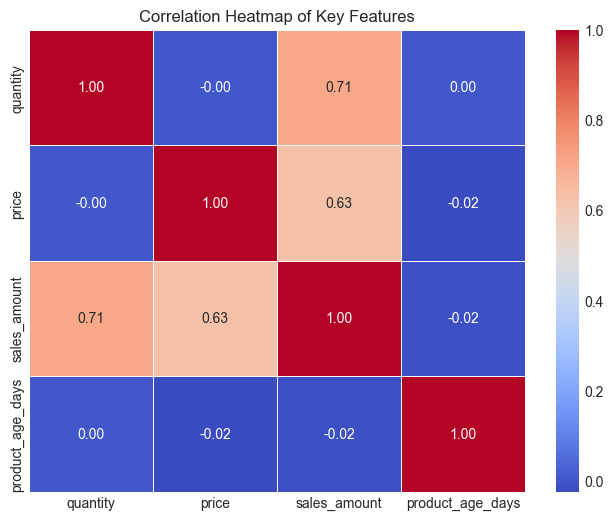

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['quantity', 'price', 'sales_amount', 'product_age_days']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Features')
plt.show()


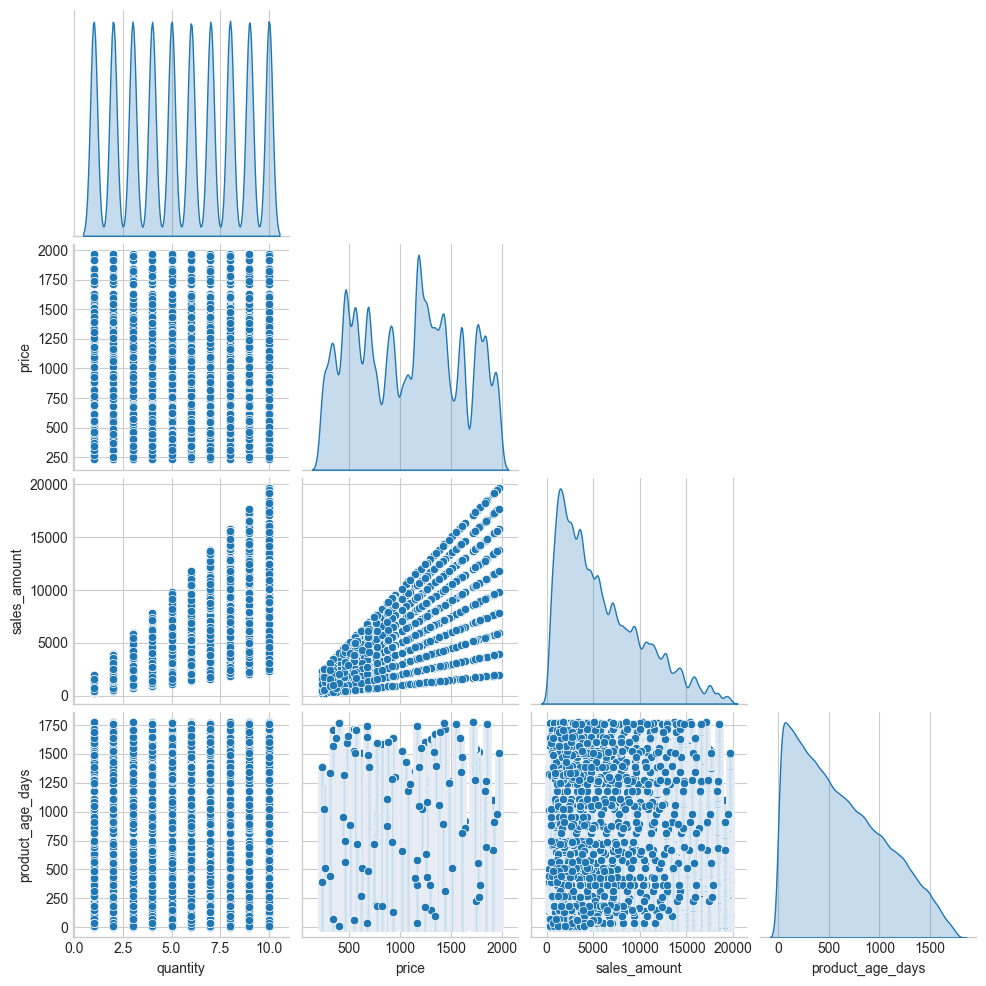

In [82]:
sns.pairplot(df[['quantity', 'price', 'sales_amount', 'product_age_days']],
             diag_kind='kde', corner=True)
plt.show()


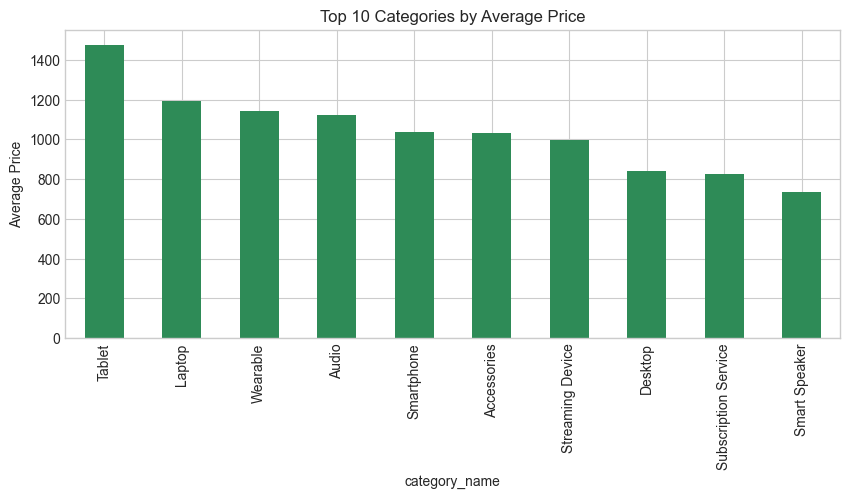

In [83]:
avg_price = df.groupby('category_name')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,4))
avg_price.plot(kind='bar', color='seagreen')
plt.title('Top 10 Categories by Average Price')
plt.ylabel('Average Price')
plt.show()


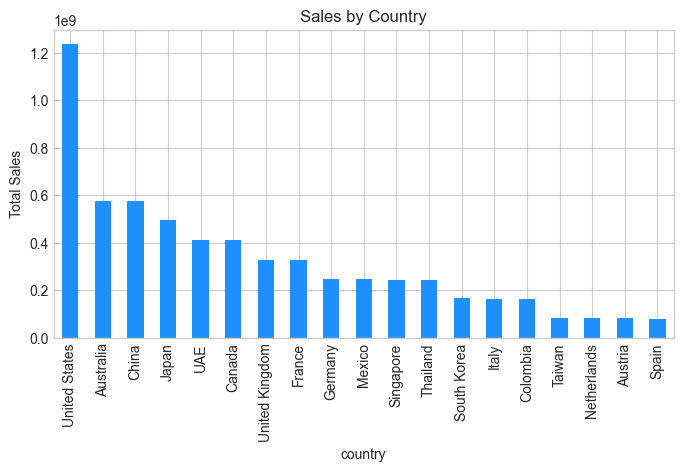

In [84]:
country_sales = df.groupby('country')['sales_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
country_sales.plot(kind='bar', color='dodgerblue')
plt.title('Sales by Country')
plt.ylabel('Total Sales')
plt.show()


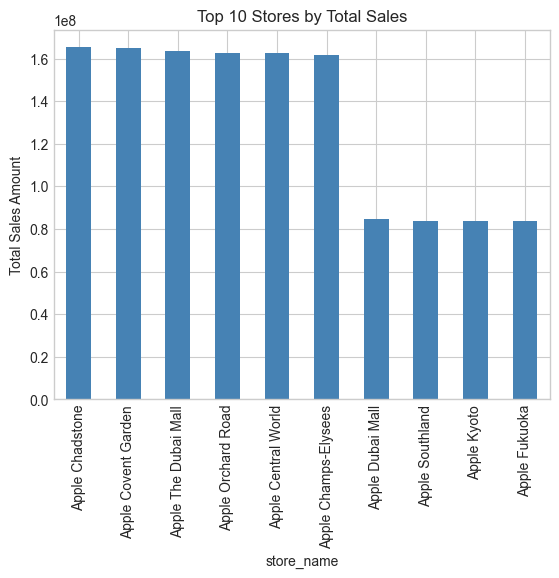

In [85]:
top_stores = df.groupby('store_name')['sales_amount'].sum().sort_values(ascending=False).head(10)
top_stores.plot(kind='bar', color='steelblue', title='Top 10 Stores by Total Sales')
plt.ylabel('Total Sales Amount')
plt.show()


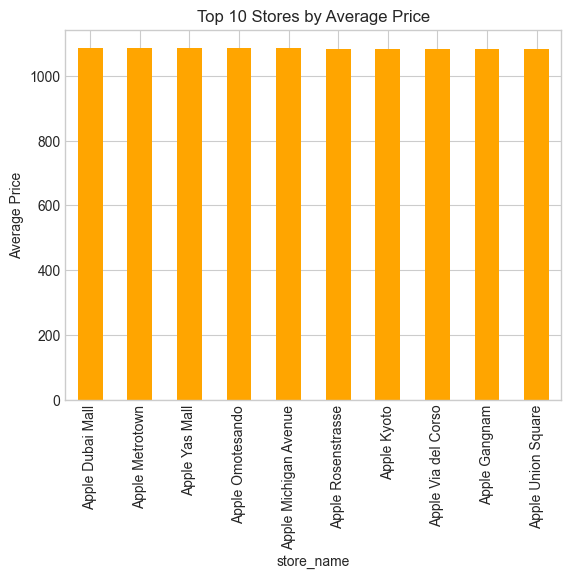

In [86]:
top_stores_price = df.groupby('store_name')['price'].mean().sort_values(ascending=False).head(10)
top_stores_price.plot(kind='bar', color='orange', title='Top 10 Stores by Average Price')
plt.ylabel('Average Price')
plt.show()


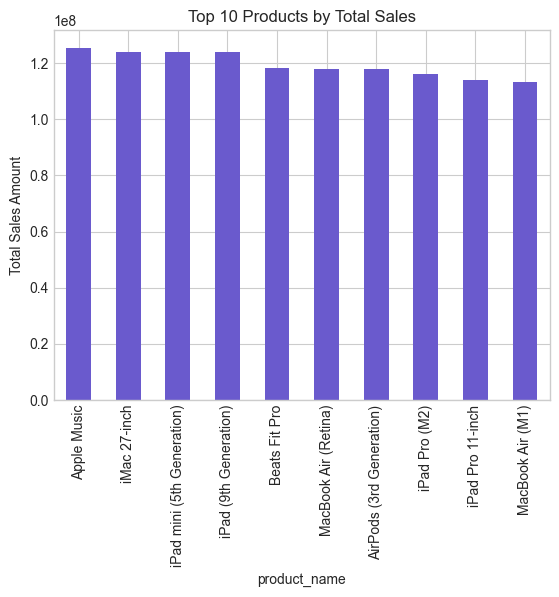

In [87]:
top_products = df.groupby('product_name')['sales_amount'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='slateblue', title='Top 10 Products by Total Sales')
plt.ylabel('Total Sales Amount')
plt.show()


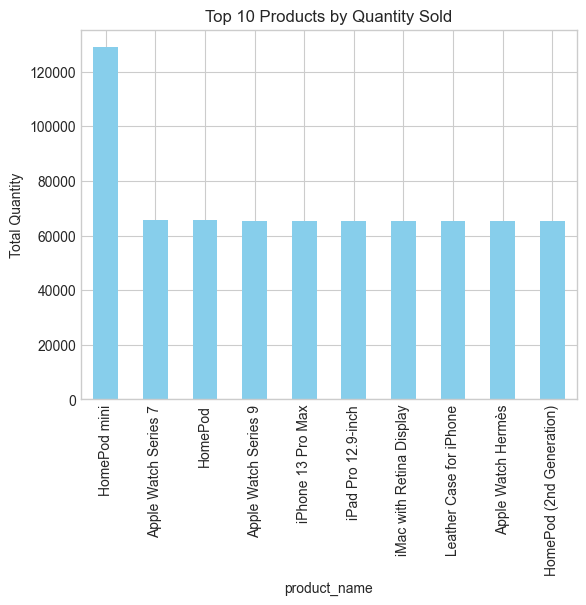

In [88]:
top_products_qty = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10)
top_products_qty.plot(kind='bar', color='skyblue', title='Top 10 Products by Quantity Sold')
plt.ylabel('Total Quantity')
plt.show()


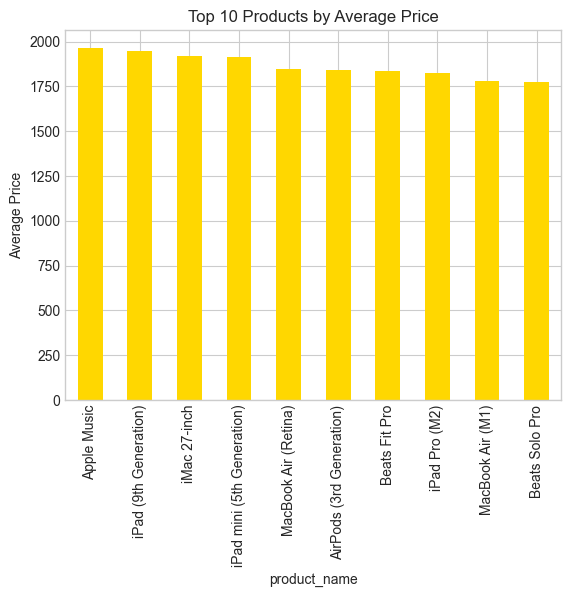

In [89]:
top_products_price = df.groupby('product_name')['price'].mean().sort_values(ascending=False).head(10)
top_products_price.plot(kind='bar', color='gold', title='Top 10 Products by Average Price')
plt.ylabel('Average Price')
plt.show()


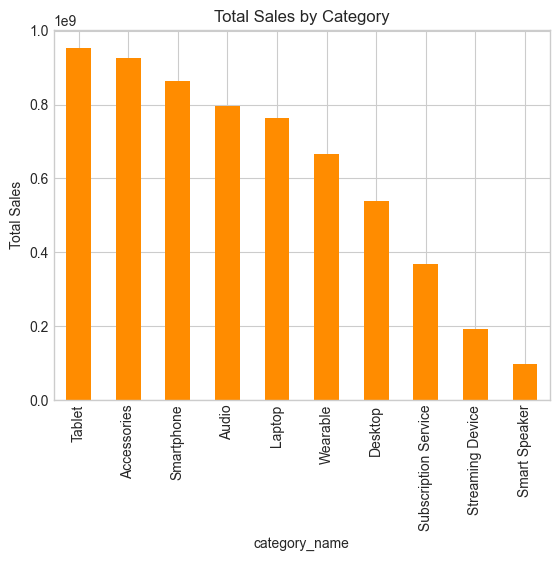

In [90]:
category_sales = df.groupby('category_name')['sales_amount'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color='darkorange', title='Total Sales by Category')
plt.ylabel('Total Sales')
plt.show()


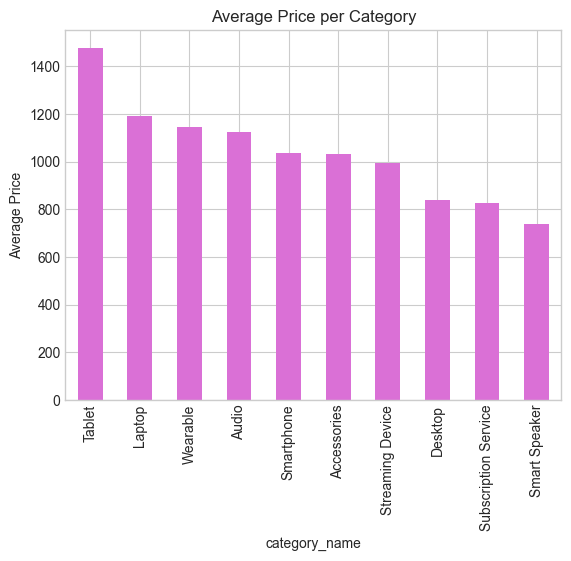

In [91]:
category_price = df.groupby('category_name')['price'].mean().sort_values(ascending=False)
category_price.plot(kind='bar', color='orchid', title='Average Price per Category')
plt.ylabel('Average Price')
plt.show()


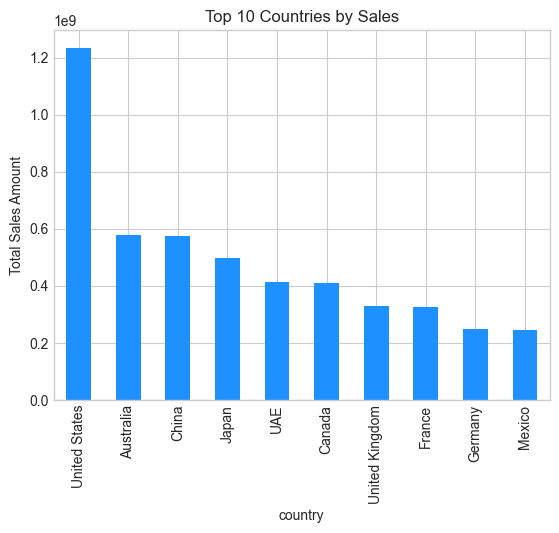

In [92]:
country_sales = df.groupby('country')['sales_amount'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', color='dodgerblue', title='Top 10 Countries by Sales')
plt.ylabel('Total Sales Amount')
plt.show()


C:\Users\Ali Sherif\AppData\Local\Temp\ipykernel_17348\944234445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_sales.index, y=year_sales.values, palette='coolwarm')


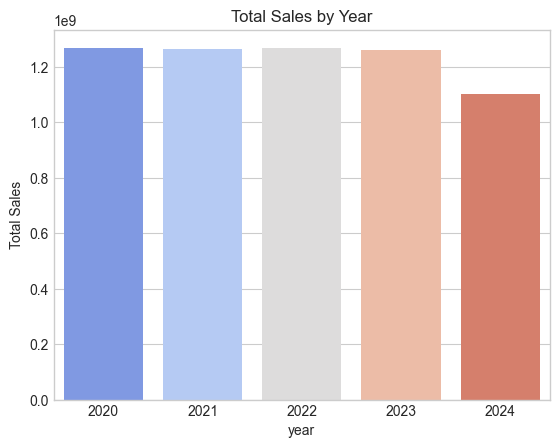

In [93]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['year'] = df['sale_date'].dt.year

year_sales = df.groupby('year')['sales_amount'].sum()
sns.barplot(x=year_sales.index, y=year_sales.values, palette='coolwarm')
plt.title('Total Sales by Year')
plt.ylabel('Total Sales')
plt.show()


C:\Users\Ali Sherif\AppData\Local\Temp\ipykernel_17348\1999080100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')


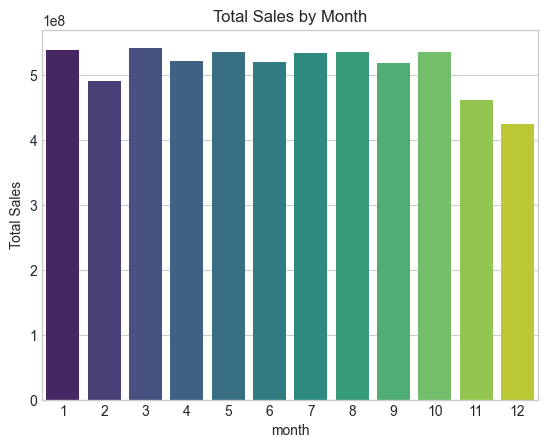

In [94]:
df['month'] = df['sale_date'].dt.month

month_sales = df.groupby('month')['sales_amount'].sum()
sns.barplot(x=month_sales.index, y=month_sales.values, palette='viridis')
plt.title('Total Sales by Month')
plt.ylabel('Total Sales')
plt.show()


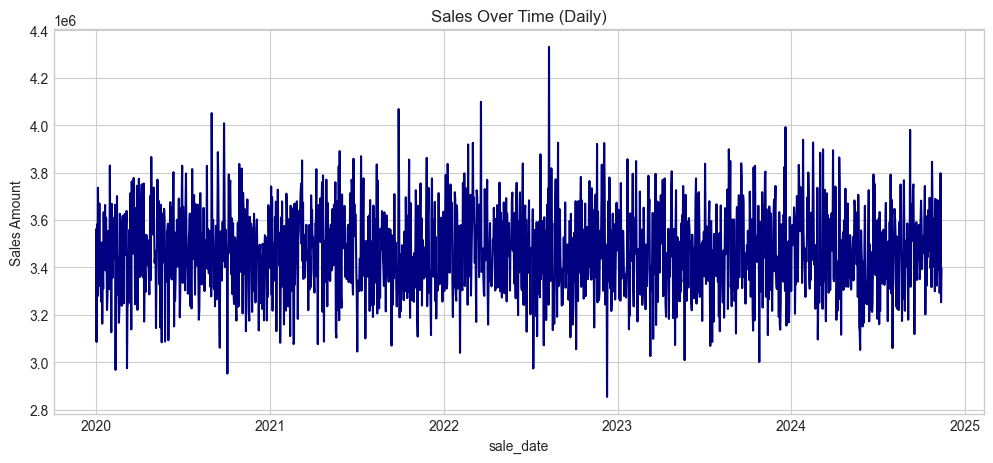

In [95]:
daily_sales = df.groupby('sale_date')['sales_amount'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=daily_sales, x='sale_date', y='sales_amount', color='navy')
plt.title('Sales Over Time (Daily)')
plt.ylabel('Sales Amount')
plt.show()


C:\Users\Ali Sherif\AppData\Local\Temp\ipykernel_17348\2552198890.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sales = df.groupby('price_bin')['sales_amount'].mean().reset_index()
C:\Users\Ali Sherif\AppData\Local\Temp\ipykernel_17348\2552198890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_sales, x='price_bin', y='sales_amount', palette='magma')


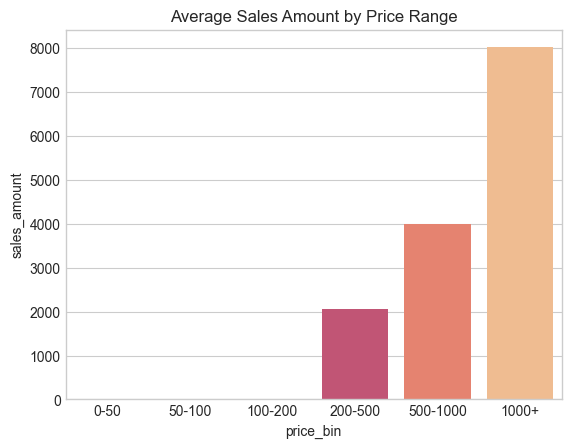

In [96]:
df['price_bin'] = pd.cut(df['price'], bins=[0,50,100,200,500,1000,5000],
                         labels=['0-50','50-100','100-200','200-500','500-1000','1000+'])

price_sales = df.groupby('price_bin')['sales_amount'].mean().reset_index()
sns.barplot(data=price_sales, x='price_bin', y='sales_amount', palette='magma')
plt.title('Average Sales Amount by Price Range')
plt.show()


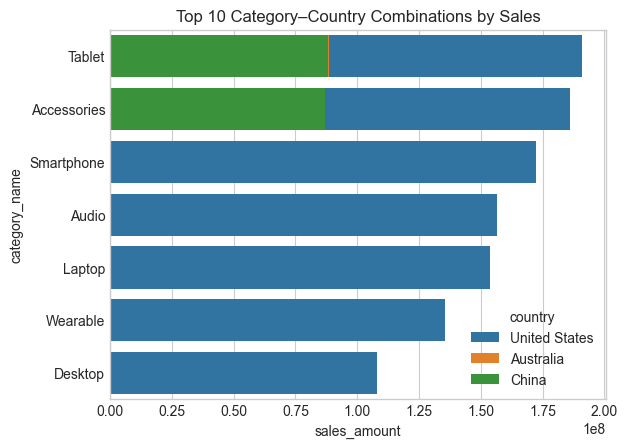

In [97]:
cat_country_sales = (df.groupby(['country', 'category_name'])['sales_amount']
                     .sum()
                     .reset_index()
                     .sort_values('sales_amount', ascending=False)
                     .head(10))

sns.barplot(data=cat_country_sales, x='sales_amount', y='category_name', hue='country', dodge=False)
plt.title('Top 10 Category–Country Combinations by Sales')
plt.show()


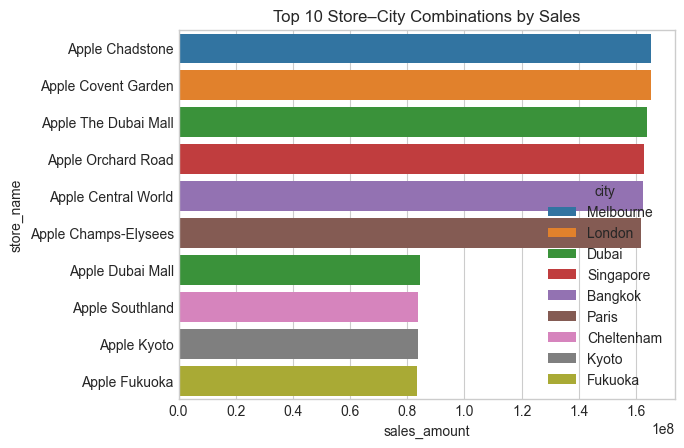

In [98]:
store_city_sales = (df.groupby(['city', 'store_name'])['sales_amount']
                    .sum()
                    .reset_index()
                    .sort_values('sales_amount', ascending=False)
                    .head(10))

sns.barplot(data=store_city_sales, x='sales_amount', y='store_name', hue='city', dodge=False)
plt.title('Top 10 Store–City Combinations by Sales')
plt.show()


c:\Users\Ali Sherif\Apple-Retail-Sales-Forcasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ali Sherif\Apple-Retail-Sales-Forcasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Ali Sherif\Apple-Retail-Sales-Forcasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


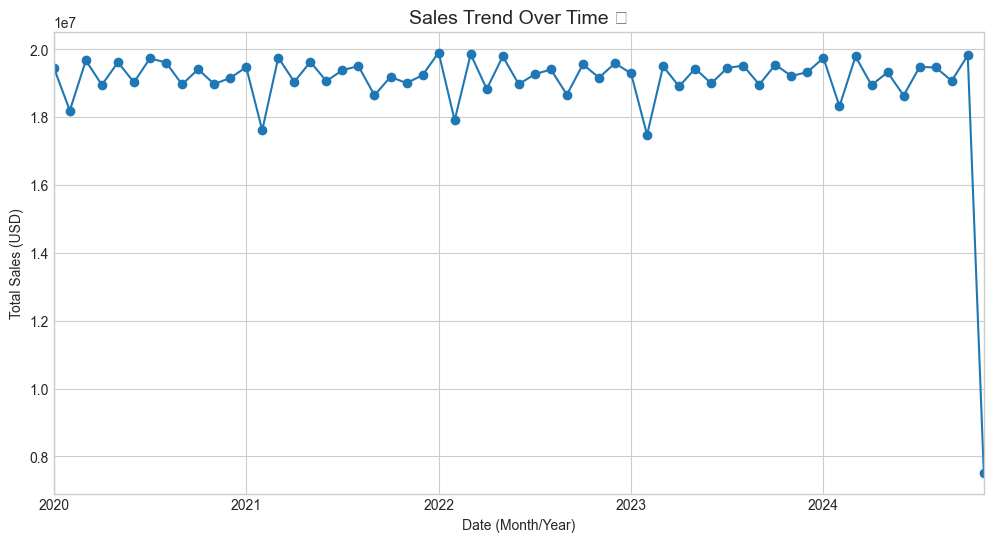

In [99]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')

# Monthly aggregation
sales_over_time = df.groupby(df['sale_date'].dt.to_period('M'))['price'].sum()

plt.figure(figsize=(12,6))
sales_over_time.plot(kind='line', marker='o')
plt.title("Sales Trend Over Time 📈", fontsize=14)
plt.xlabel("Date (Month/Year)")
plt.ylabel("Total Sales (USD)")
plt.show()

c:\Users\Ali Sherif\Apple-Retail-Sales-Forcasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


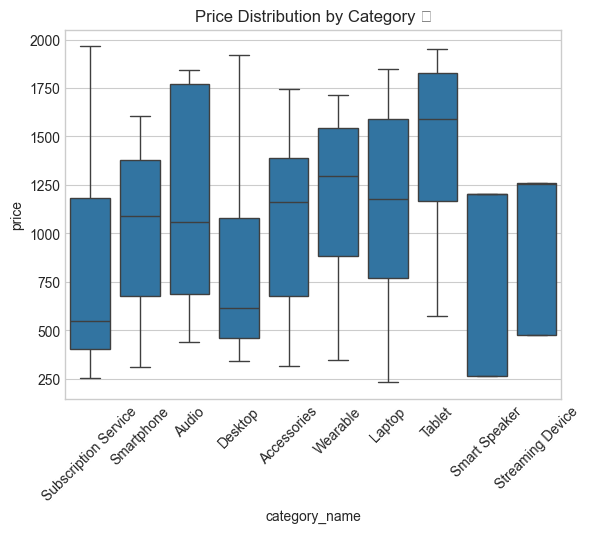

In [100]:
sns.boxplot(x='category_name', y='price', data=df)
plt.title("Price Distribution by Category 💰")
plt.xticks(rotation=45)
plt.show()

C:\Users\Ali Sherif\AppData\Local\Temp\ipykernel_17348\3607484410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category_name', y='price', hue='country', data=filtered, ci=None)
c:\Users\Ali Sherif\Apple-Retail-Sales-Forcasting\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


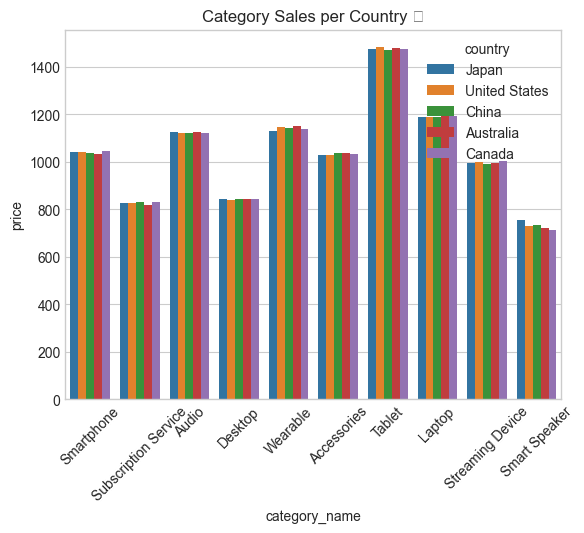

In [101]:
top_countries = df['country'].value_counts().head(5).index
filtered = df[df['country'].isin(top_countries)]

sns.barplot(x='category_name', y='price', hue='country', data=filtered, ci=None)
plt.title("Category Sales per Country 🌍")
plt.xticks(rotation=45)
plt.show()

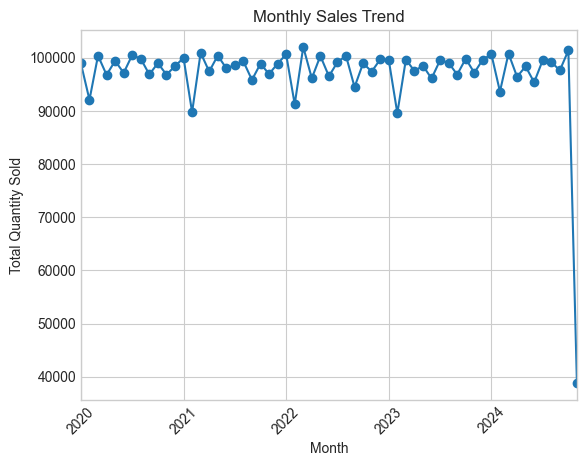

In [102]:
df['sale_date'] = pd.to_datetime(df['sale_date'])
sales_trend = df.groupby(df['sale_date'].dt.to_period('M'))['quantity'].sum()
plt.figure()
sales_trend.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

In [103]:
os.makedirs('reports/figures/product_trends', exist_ok=True)

for product in df['product_name'].unique():
    product_data = df[df['product_name'] == product]
    sales_trend = (
        product_data
        .groupby(product_data['sale_date'].dt.to_period('M'))['sales_amount']
        .sum()
    )

    
    if sales_trend.empty:
        continue

    
    plt.figure(figsize=(10,6))
    sales_trend.plot(marker='o')
    plt.title(f"Monthly Sales Trend for {product}")
    plt.xlabel("Month")
    plt.ylabel("Sales Amount")
    plt.tight_layout()

    
    plt.savefig(f"reports/figures/product_trends/{product[:50].replace('/', '-')}.png")
    plt.close()

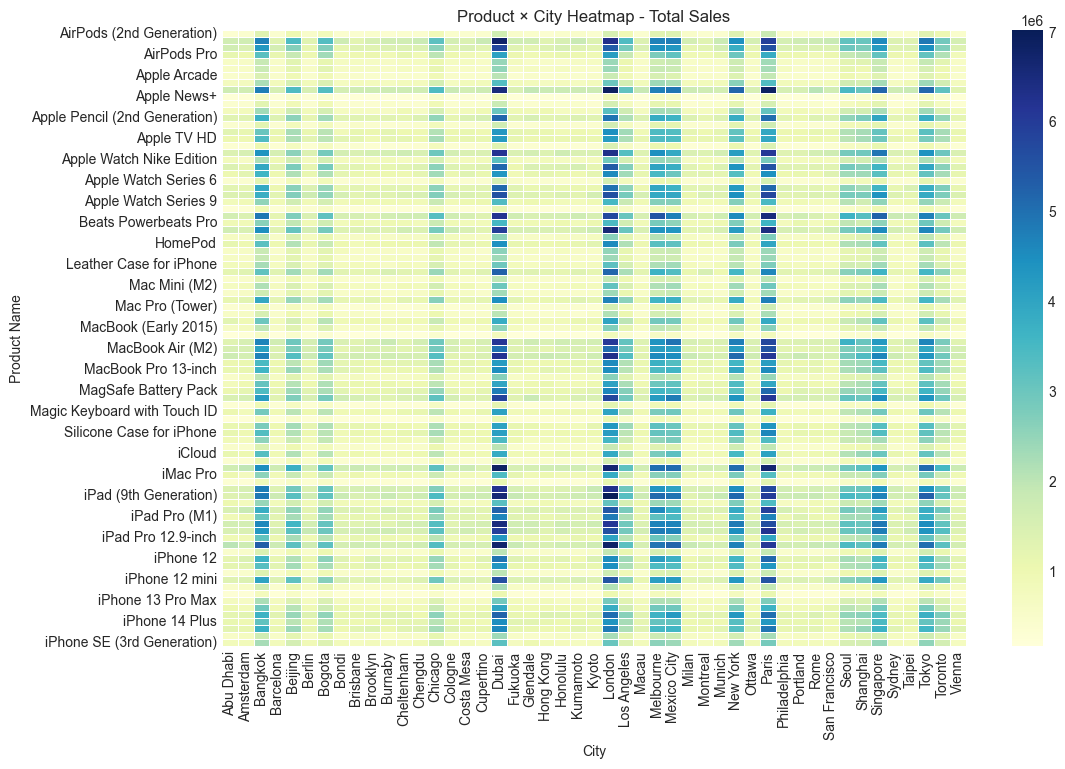

In [104]:
product_city = df.groupby(['product_name', 'city'])['sales_amount'].sum().reset_index()

# ✅ Correct pivot syntax
pivot_table = product_city.pivot(index='product_name', columns='city', values='sales_amount').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Product × City Heatmap - Total Sales")
plt.xlabel("City")
plt.ylabel("Product Name")
plt.show()

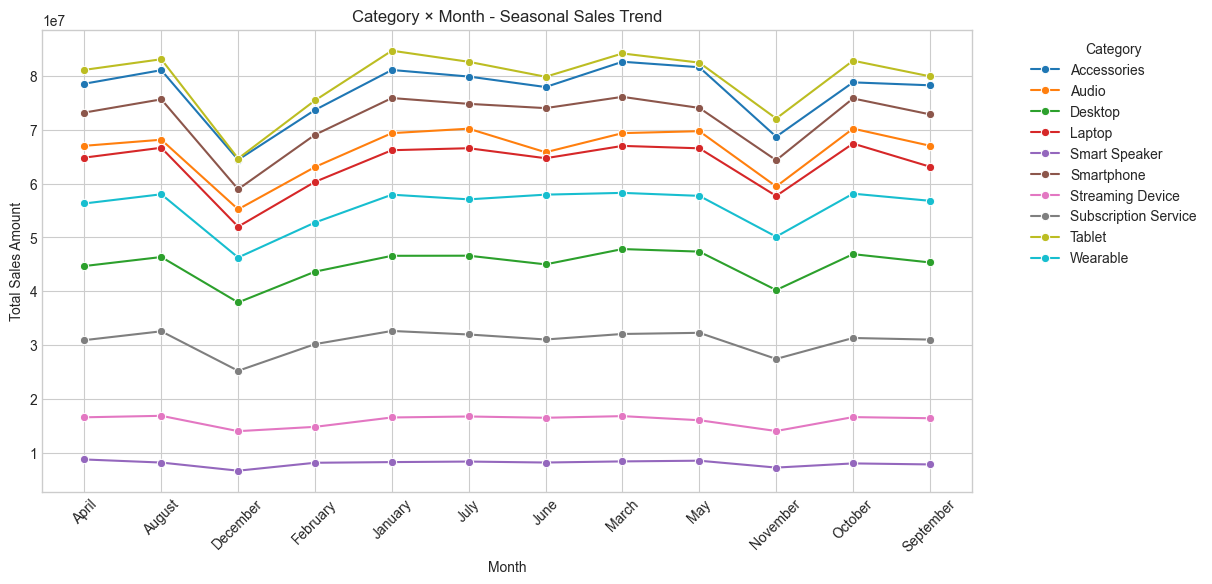

In [105]:
df['sale_date'] = pd.to_datetime(df['sale_date'], errors='coerce')
df['month'] = df['sale_date'].dt.month_name()

category_month = df.groupby(['category_name', 'month'])['sales_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='sales_amount', hue='category_name', data=category_month, marker='o')
plt.title("Category × Month - Seasonal Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


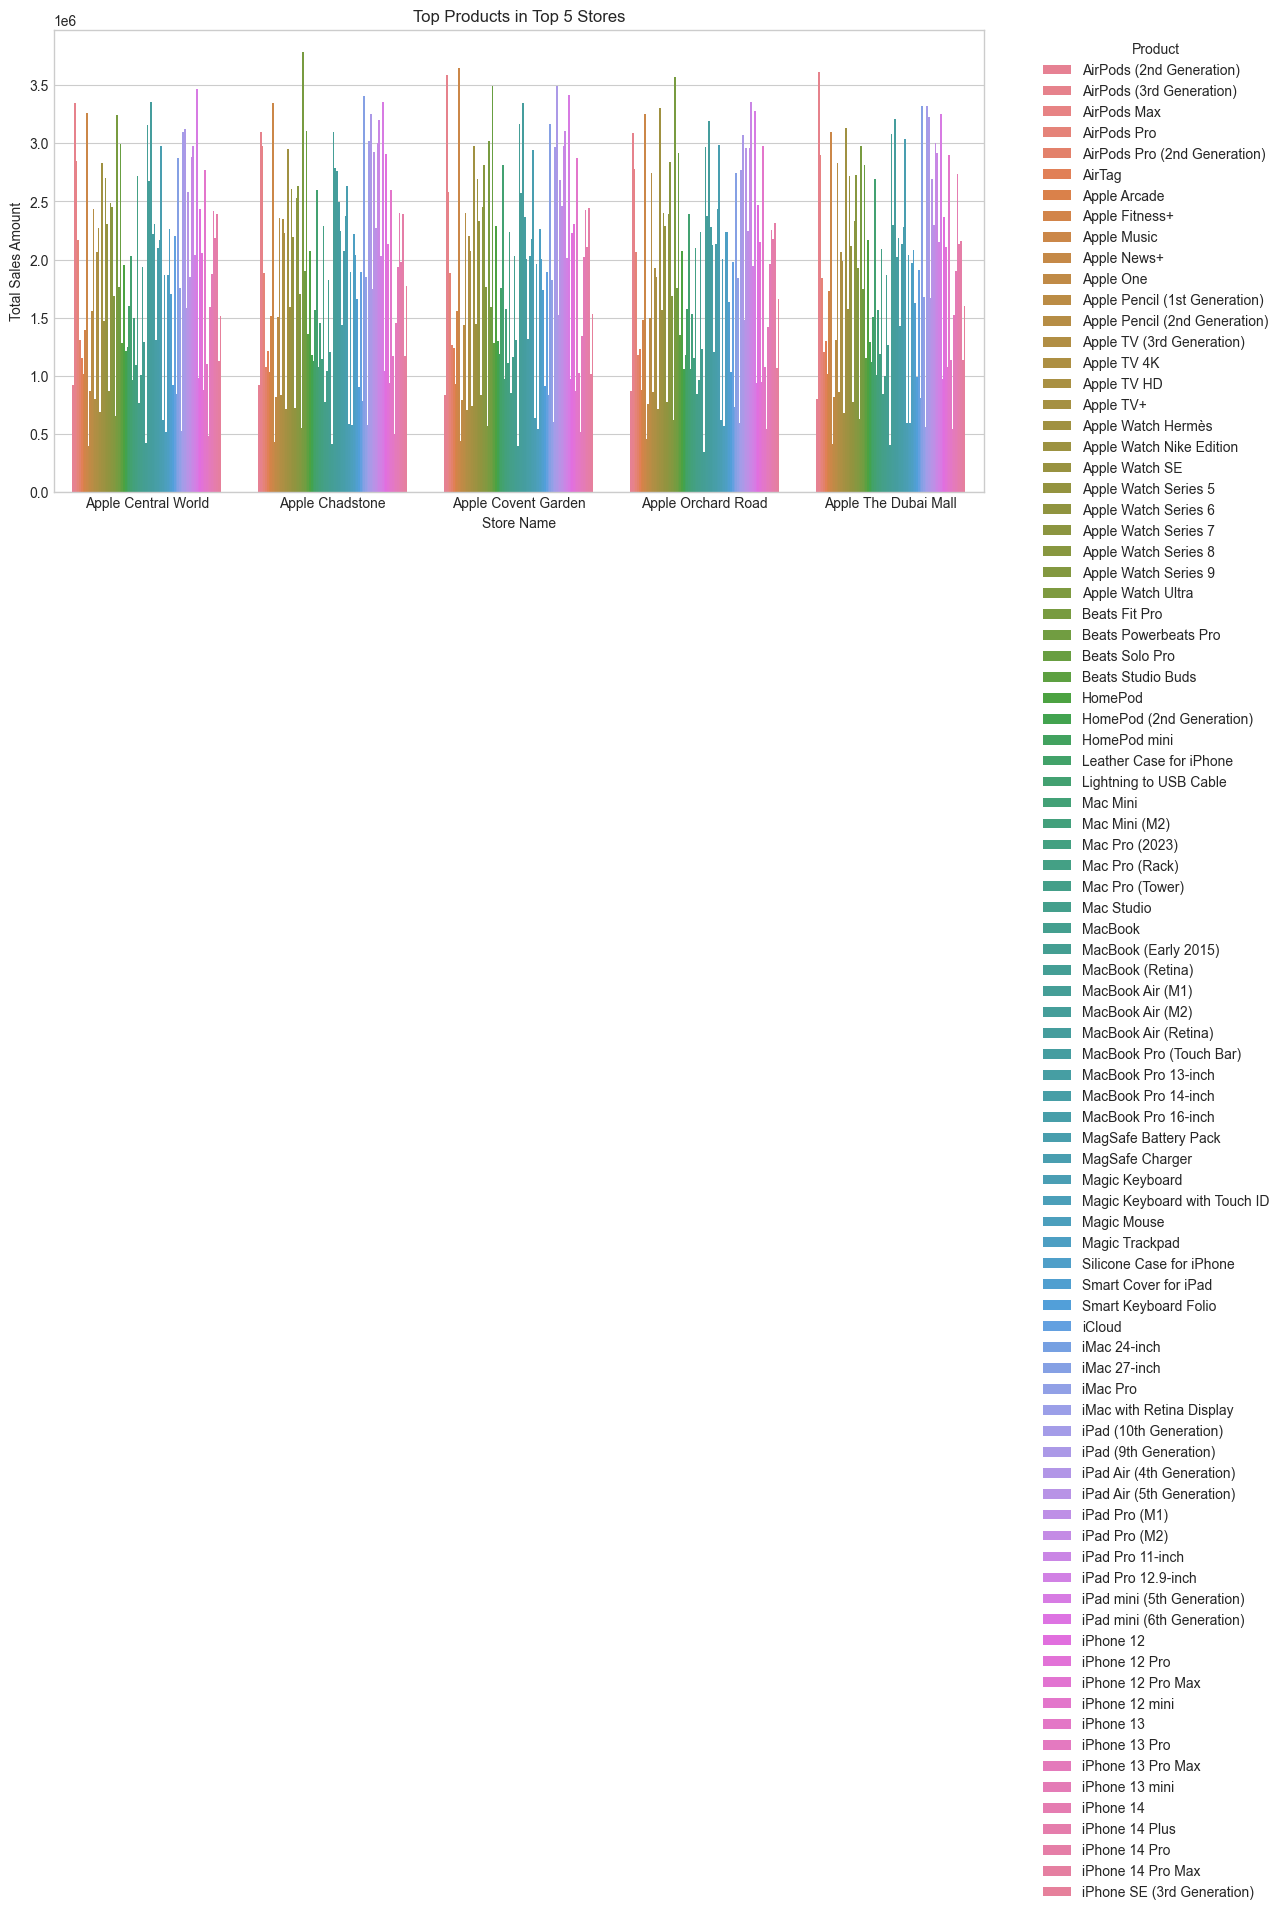

In [106]:
store_product = df.groupby(['store_name', 'product_name'])['sales_amount'].sum().reset_index()

plt.figure(figsize=(12,6))
top_stores = store_product.groupby('store_name')['sales_amount'].sum().nlargest(5).index
sns.barplot(x='store_name', y='sales_amount', hue='product_name', data=store_product[store_product['store_name'].isin(top_stores)])
plt.title("Top Products in Top 5 Stores")
plt.xlabel("Store Name")
plt.ylabel("Total Sales Amount")
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


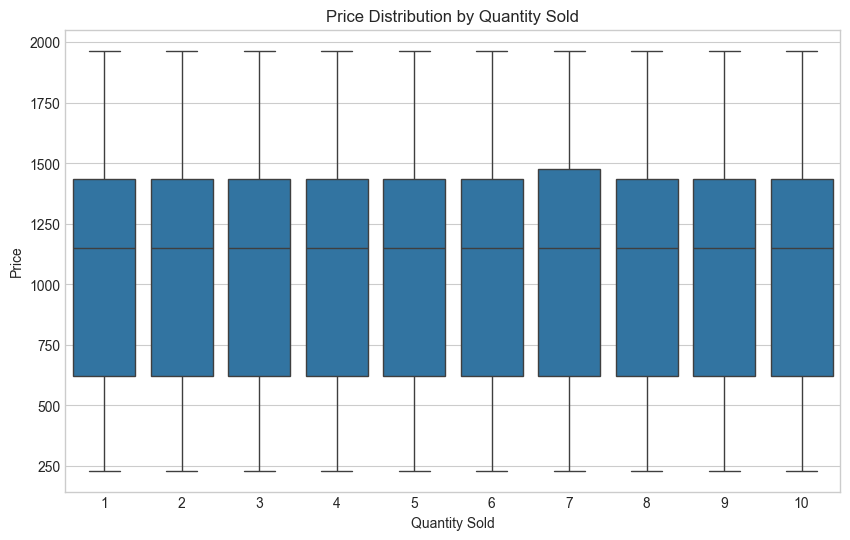

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quantity', y='price', data=df)
plt.title('Price Distribution by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Price')
plt.show()


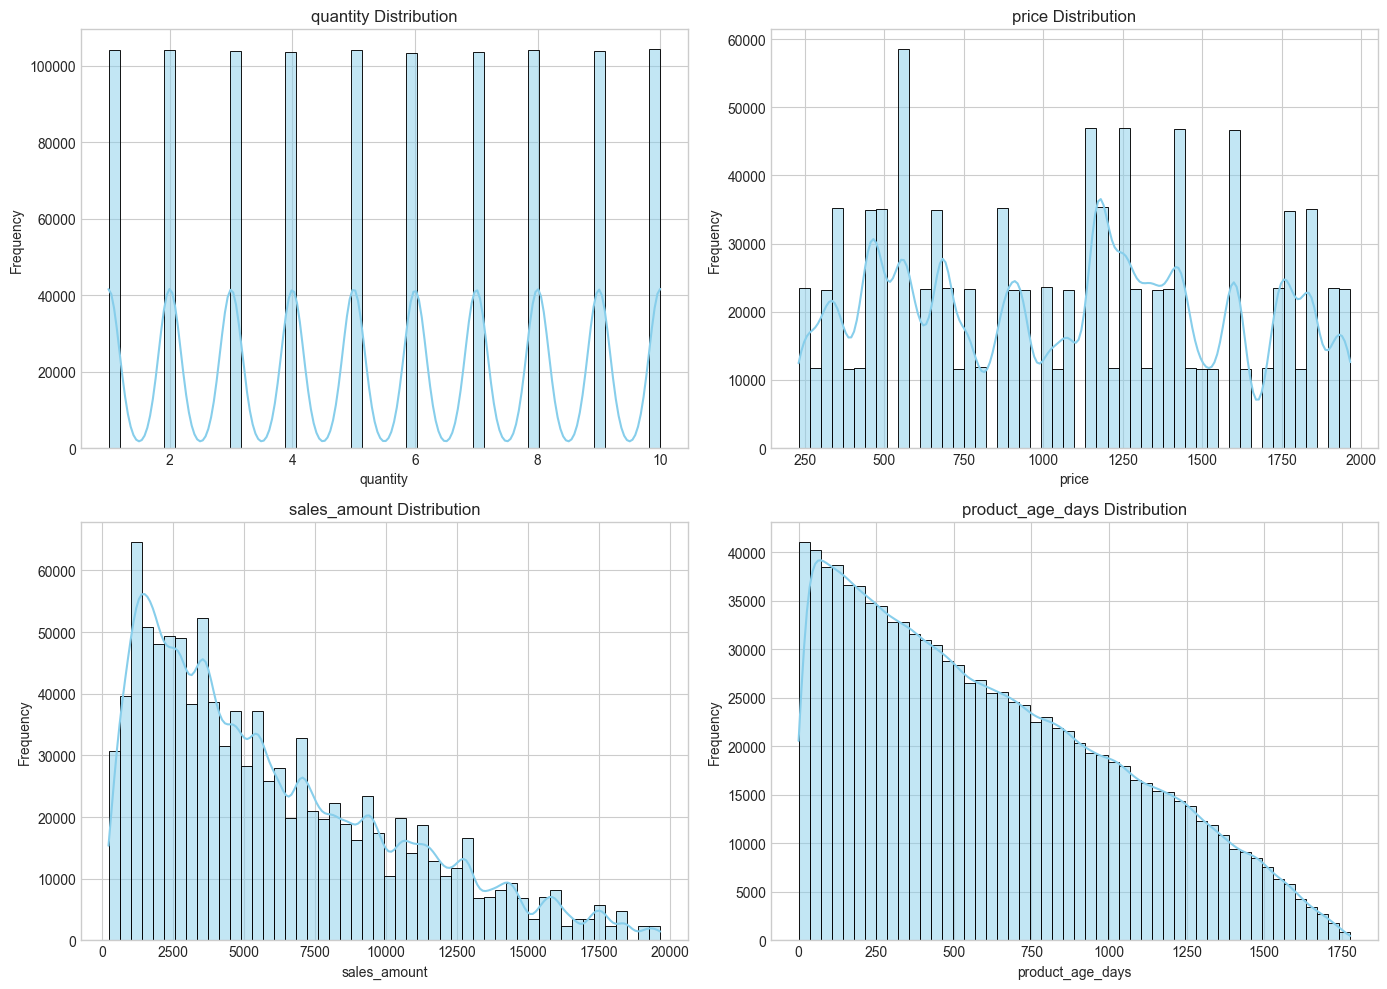

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Numerical columns to explore
num_cols = ['quantity', 'price', 'sales_amount', 'product_age_days']

plt.figure(figsize=(14,10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
